# Pre-processing Steps

<ol>1. Filling the missing values</ol>
<ol>2. Converting categories to numbers</ol>
<ol>3. Bring all the variables in range 0 to 1</ol>

In [1]:
# importing required libraries
import pandas as pd

In [2]:
# check version on pandas
print('Version of pandas:', pd.__version__)

Version of pandas: 1.2.4


In [3]:
# reading the loan prediction data
data = pd.read_csv('loan_data.csv')

In [4]:
# looking at the first five rows of the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# shape of the data
data.shape

(614, 13)

In [6]:
# checking missing values in the data
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# data types of the variables
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 1. Filling the missing values

### Categorical Data: Mode

In [8]:
# filling missing values of categorical variables with mode

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

data['Married'].fillna(data['Married'].mode()[0], inplace=True)

data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)

data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

### Continuous Data: Mean

In [9]:
# filling missing values of continuous variables with mean
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace=True)

In [10]:
# checking missing values after imputation
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## 2. Converting categories to numbers

In [11]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [12]:
# converting the categories into numbers using map function
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].map({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].map({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1})

In [13]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


## 3. Bringing all the variables in range 0 to 1

<img src='https://drive.google.com/uc?id=1Z7wN2BE8CDSYIJly5l0K9uqYdj9WUo3f'>

In [14]:
# bringing variables in the range 0 to 1
data['Dependents']=(data['Dependents']-data['Dependents'].min())/(data['Dependents'].max()-data['Dependents'].min())

In [15]:
# applying for loop to bring all the variables in range 0 to 1

for i in data.columns[1:]:
    data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [16]:
# again looking at first five rows of pre-processed data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [17]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:


# check version on sklearn
print('Version of sklearn:', sklearn.__version__)

Version of sklearn: 0.24.1


In [19]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [20]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [21]:
X.shape, y.shape

((614, 11), (614,))

In [22]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [23]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [24]:
# checking the version of keras
import keras
print(keras.__version__)

2.6.0


In [25]:
# checking the version of tensorflow
import tensorflow as tf
print(tf.__version__)


2.6.0


In [26]:
# importing the sequential model
from keras.models import Sequential

In [27]:
# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [28]:
# number of input neurons
X_train.shape

(491, 11)

In [29]:
# defining input neurons
input_neurons = X_train.shape[1]

In [30]:
# define number of output neurons
output_neurons = 1

In [31]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [32]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
164,0.0,1.0,0.000000,1.0,0.0,0.113457,0.000000,0.095514,0.358974,1.0,1.0
171,0.0,1.0,1.000000,1.0,0.0,0.638380,0.000000,1.000000,0.615385,1.0,1.0
546,0.0,0.0,0.000000,0.0,0.0,0.039678,0.000000,0.102750,0.051282,1.0,0.5
226,0.0,1.0,0.000000,0.0,1.0,0.056710,0.000000,0.186686,0.743590,1.0,1.0
176,0.0,1.0,0.666667,1.0,0.0,0.023438,0.038856,0.133140,0.743590,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
560,0.0,1.0,0.666667,0.0,0.0,0.043599,0.005808,0.143271,0.743590,1.0,0.5
503,0.0,1.0,0.333333,0.0,0.0,0.048237,0.127247,0.186686,0.743590,1.0,0.0
343,0.0,1.0,1.000000,0.0,0.0,0.037390,0.000000,0.094067,0.743590,1.0,0.5
148,1.0,0.0,0.000000,1.0,0.0,0.121831,0.039984,0.312590,0.743590,1.0,0.0


In [46]:
X_train.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
dtype: object

In [49]:
y_train.dtypes

dtype('float64')

In [33]:
# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [34]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [35]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 13ms/step - loss: 0.6693 - accuracy: 0.6008 - val_loss: 0.6582 - val_accuracy: 0.6829
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6448 - accuracy: 0.6823 - val_loss: 0.6388 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6864 - val_loss: 0.6301 - val_accuracy: 0.6911
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6864 - val_loss: 0.6239 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - ETA: 0s - loss: 0.6074 - accuracy: 0.71 - 0s 3ms/step - loss: 0.6172 - accuracy: 0.6864 - val_loss: 0.6207 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.6864 - val_loss: 0.6182 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6092 - accuracy: 0.6864 - val_loss: 0.6164 

In [40]:
# getting predictions for the validation set
prediction = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [42]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

In [50]:
# calculating the accuracy on validation set
accuracy_score(y_test, predictions)

0.8130081300813008

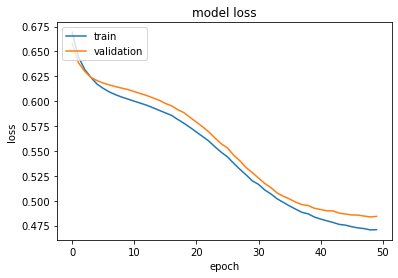

In [51]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

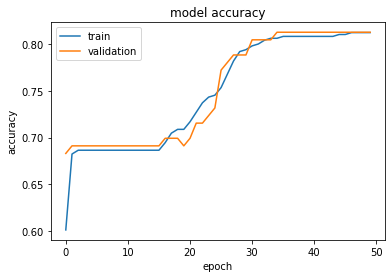

In [54]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()